In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import cv2
import numpy as np

# Path to the dataset directory
dataset_dir = '/kaggle/input/pc-parts/pc_parts'

# Initialize lists to store images and labels
images = []
labels = []

# # Iterate over each folder (class) in the dataset directory
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
#     print(class_dir+' '+class_name+' '+dataset_dir)
#     # Iterate over each image in the class directory
    for filename in os.listdir(class_dir):
        img_path = os.path.join(class_dir, filename)
#         # Read the image using OpenCV
        img = cv2.imread(img_path)
#         # Append the image to the images list
        images.append(img)
#         # Append the label (class) to the labels list
        labels.append(class_name)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# # Print the number of images and unique labels
print("Number of images:", len(images))
print("Unique labels:", np.unique(labels))

Number of images: 1248
Unique labels: ['cables' 'case' 'cpu' 'hdd' 'headset']


In [3]:
grayscale_images=np.empty((images.shape[0],images.shape[1],images.shape[2]),dtype=np.uint8)

for i,img in enumerate(images):
    grayimage=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    grayscale_images[i]=grayimage

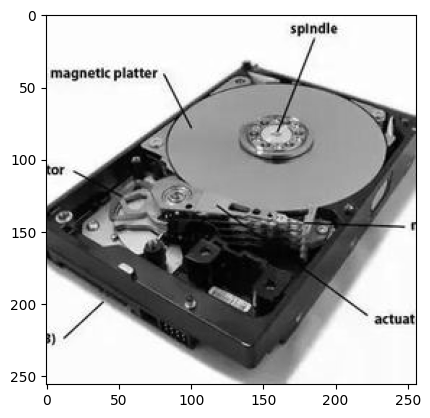

In [4]:
import matplotlib.pyplot as plt
img_plot=plt.imshow(grayscale_images[102],cmap='gray')
plt.show()

In [8]:
def normalize_images(images):
    # Convert images to floating point
    images = images.astype('float32')
    # Normalize pixel values to [0, 1]
    images /= 255.0
    return images

# Assuming grayscale_images is a list of grayscale images represented as numpy arrays
normalized_images = normalize_images(grayscale_images)

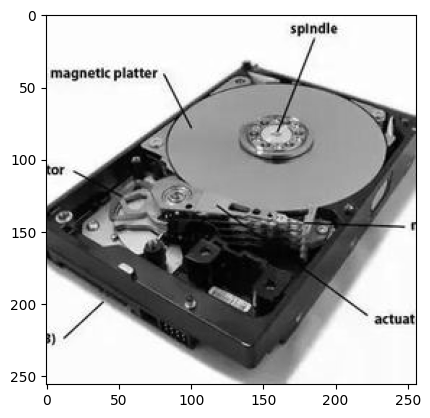

In [9]:
import matplotlib.pyplot as plt
img_plot=plt.imshow(normalized_images[102],cmap='gray')
plt.show()

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming grayscale_images and labels are already loaded

# Convert labels into numerical form
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels)

# Convert images to numpy array
normalized_images = np.array(normalized_images)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_images, numerical_labels, test_size=0.2, random_state=42)


# Reshape grayscale images to add channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


In [11]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=64)

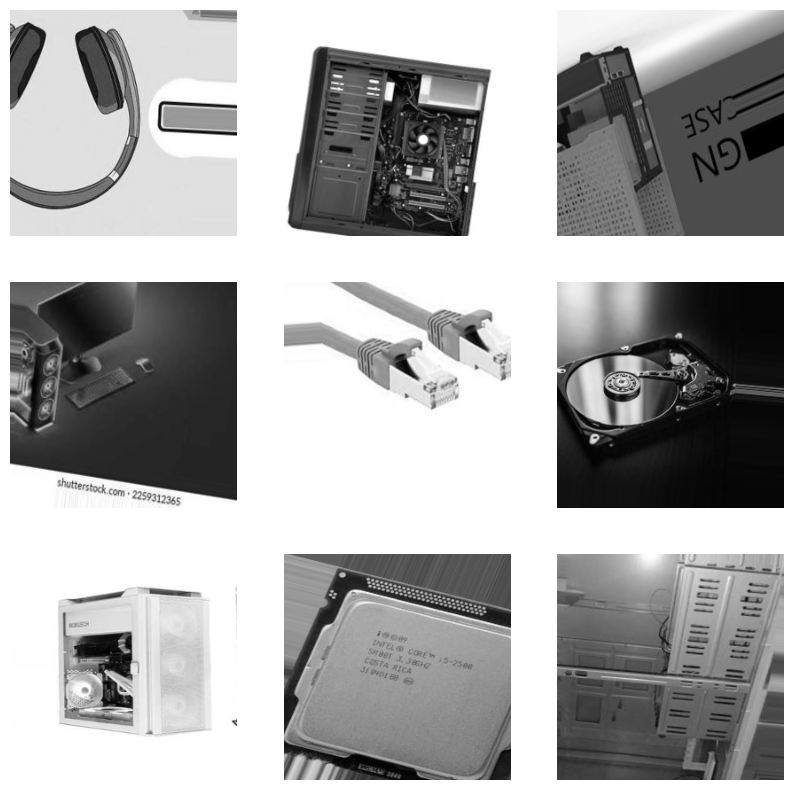

In [12]:
import matplotlib.pyplot as plt

# Generate augmented images
augmented_images, _ = next(train_generator)

# Plot augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].reshape(256, 256), cmap='gray')  # Assuming images are grayscale
    plt.axis("off")
plt.show()

In [13]:
X_train.shape[1:]

# Define augmentation parameters


# Define CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1:])),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Prepare data generators


# Train the model with data augmentation
model.fit(train_generator, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Make predictions
predictions = model.predict(X_test)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-08 02:49:51.484073: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.13508, expected 1.60805
2024-04-08 02:49:51.484127: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.29003, expected 1.76301
2024-04-08 02:49:51.484142: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.69399, expected 2.16697
2024-04-08 02:49:51.484155: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.78095, expected 2.25392
2024-04-08 02:49:51.484168: E external/local_xla/xla/service/gpu/buffer_comparator.cc:11

 2/16 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2930 - loss: 4.3564 

I0000 00:00:1712544602.558517      85 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 5/16 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.2533 - loss: 6.3812

2024-04-08 02:50:04.744561: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.91515, expected 2.36351
2024-04-08 02:50:04.744629: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 3.68165, expected 3.13001
2024-04-08 02:50:04.744639: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.89768, expected 2.34604
2024-04-08 02:50:04.744647: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 3.20022, expected 2.64858
2024-04-08 02:50:04.744654: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.14734, expected 3.59569
2024-04-08 02:50:04.744662: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 3.64638, expected 3.09474
2024-04-08 02:50:04.744670: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.48227, expected 1.93063
2024-04-08 02:50:04.744677: E external/local_xla/xla/se

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.2255 - loss: 6.2887

2024-04-08 02:50:13.051239: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.17116, expected 2.3988
2024-04-08 02:50:13.051297: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 3.1422, expected 2.36983
2024-04-08 02:50:13.051313: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 3.57895, expected 2.80658
2024-04-08 02:50:13.051327: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 3.777, expected 3.00463
2024-04-08 02:50:13.051338: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.47309, expected 2.70072
2024-04-08 02:50:13.051348: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 3.91607, expected 3.14371
2024-04-08 02:50:13.051362: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.71069, expected 2.93833
2024-04-08 02:50:13.051373: E external/local_xla/xla/servic

16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2248 - loss: 6.1845 - val_accuracy: 0.2600 - val_loss: 20.0901
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.2383 - loss: 12.8118 - val_accuracy: 0.2680 - val_loss: 38.7751
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.2602 - loss: 15.5375 - val_accuracy: 0.2600 - val_loss: 23.5706
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.2493 - loss: 15.6399 - val_accuracy: 0.2880 - val_loss: 27.5371
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.2941 - loss: 5.3713 - val_accuracy: 0.2800 - val_loss: 10.5526
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.2358 - loss: 3.4403 - val_accuracy: 0.2280 - val_loss: 17.7374
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.2604 - loss: 6.3603 - val_accuracy: 0.2320 - val_loss: 5.6763
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.2198 - loss: 7.0944 - val_accuracy: 0.2720